# **Análisis de Distribución y Desviaciones Usando Histogramas y Boxplots**

**Objetivo**

El objetivo de esta actividad es desarrollar habilidades avanzadas en la visualización de datos utilizando histogramas y boxplots. Usaremos un dataset interesante de Kaggle para explorar la distribución de los datos y detectar cualquier valor atípico. Esta actividad te ayudará a entender mejor la distribución de los datos y cómo los valores atípicos pueden afectar tu análisis.

Descripción del Ejercicio **texto en negrita**

En esta actividad, utilizaremos el dataset “World Happiness Report” de Kaggle, que contiene información sobre la felicidad en diferentes países del mundo. Este dataset incluye variables como el puntaje de felicidad, el PIB per cápita, la expectativa de vida saludable, la libertad, la generosidad, entre otras.

Puedes descargar el dataset desde el siguiente enlace: World Happiness Report.

# **1. Cargar y Explorar los Datos:**
* Descarga el dataset y cárgalo en un DataFrame de Pandas.
* Realiza una exploración inicial de los datos para entender las variables disponibles.

**1.- Preparación del Entorno **

In [29]:
# Conectamos nuestro drive.
from google.colab import drive
# Este comando conecta colab con drive.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# Importaciones
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
# Importamos una bbdd en formato csv y lo guardamos en una variable.
path = "/content/drive/MyDrive/Bootcamp-CSDATOS/CORES/histogramas&boxplots/2015.csv"  #cambiar x url de la data
df = pd.read_csv(path)
# Generamos una copia para no modificar el original
df2= df.copy()

**2.- Inspeccionamos la data**

In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [33]:
df2.head(5)  #para verificar la carga de la data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [34]:
df2.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [35]:
#Confirmando que no hay  datos faltantes x columnas
print("\nValores faltantes por columna:")
print(df2.isnull().sum())


Valores faltantes por columna:
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


In [36]:
df2.shape

(158, 12)

In [37]:
# Tipos de datos de las columnas
print(df2.dtypes)

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object


In [38]:
df2.head(5)


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [39]:
# Usamos lower y replace para limpiar--> Cambio de nombres en columnas: Buena Práctica
df2.columns = df2.columns.str.lower().str.replace(" ", "_")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        158 non-null    object 
 1   region                         158 non-null    object 
 2   happiness_rank                 158 non-null    int64  
 3   happiness_score                158 non-null    float64
 4   standard_error                 158 non-null    float64
 5   economy_(gdp_per_capita)       158 non-null    float64
 6   family                         158 non-null    float64
 7   health_(life_expectancy)       158 non-null    float64
 8   freedom                        158 non-null    float64
 9   trust_(government_corruption)  158 non-null    float64
 10  generosity                     158 non-null    float64
 11  dystopia_residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [40]:
df2.tail(5)

,country,region,happiness_rank,happiness_score,standard_error,economy_(gdp_per_capita),family,health_(life_expectancy),freedom,trust_(government_corruption),generosity,dystopia_residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726



# **2. Crear Histogramas:**
* Crea histogramas para las variables Score, GDP per capita, Healthy life expectancy y Freedom to make life choices.
* Personaliza los histogramas con colores, bordes y ajustes de transparencia.

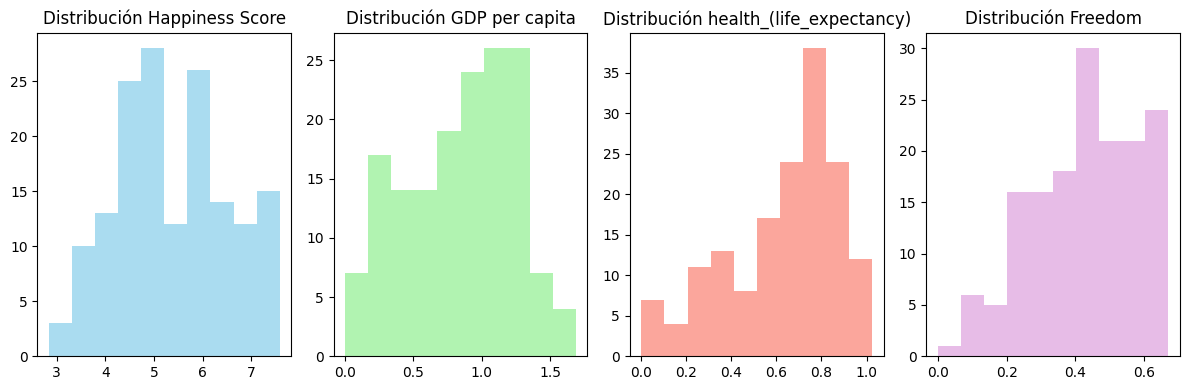

In [41]:


data1 = df2['happiness_score']
data2 = df2['economy_(gdp_per_capita)']
data3 = df2['health_(life_expectancy)']
data4 = df2['freedom']



# Tamaño del lienzo (ancho x alto).
plt.figure(figsize=(12, 4))

# Primer gráfico
plt.subplot(1, 4, 1)  # 1 fila, 3 columnas, gráfico 1.
plt.hist(data1, bins=10, color='skyblue',alpha=0.7)
plt.title('Distribución Happiness Score')

# Segundo gráfico
plt.subplot(1, 4, 2)  # Gráfico 2.
plt.hist(data2, bins=10, color='lightgreen',alpha=0.7)
plt.title('Distribución GDP per capita')

# Tercer gráfico
plt.subplot(1, 4, 3)  # Gráfico 3.
plt.hist(data3, bins=10, color='salmon',alpha=0.7)
plt.title('Distribución health_(life_expectancy)')

# Cuarto gráfico
plt.subplot(1, 4, 4)  # Gráfico 4.
plt.hist(data4, bins=10, color='plum',alpha=0.7)
plt.title('Distribución Freedom')
plt.tight_layout()
plt.show()


# **3. Crear Boxplots:**
* Crea boxplots para las mismas variables para visualizar la mediana, el rango intercuartil y los valores atípicos.

* Personaliza los boxplots con diferentes colores y estilos.

<ipython-input-42-2912832608>:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(datos, labels=['Happiness_score', 'PIB', 'Health', 'Freedom'],patch_artist=True)


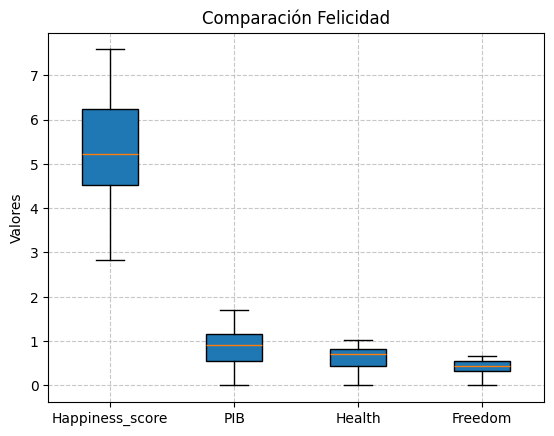

In [42]:

data1 = df2['happiness_score']
data2 = df2['economy_(gdp_per_capita)']
data3 = df2['health_(life_expectancy)']
data4 = df2['freedom']

# Juntamos los datos en una lista.
datos = [data1, data2, data3, data4]

# Creamos el boxplot.
plt.boxplot(datos, labels=['Happiness_score', 'PIB', 'Health', 'Freedom'],patch_artist=True)


# Añadimos título y etiquetas.
plt.title('Comparación Felicidad')
plt.ylabel('Valores')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# **4. Análisis Combinado:**
* Combina los histogramas y los boxplots en una sola figura para cada variable.
* Interpreta los resultados y escribe un análisis sobre la distribución de cada variable y la presencia de valores atípicos

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

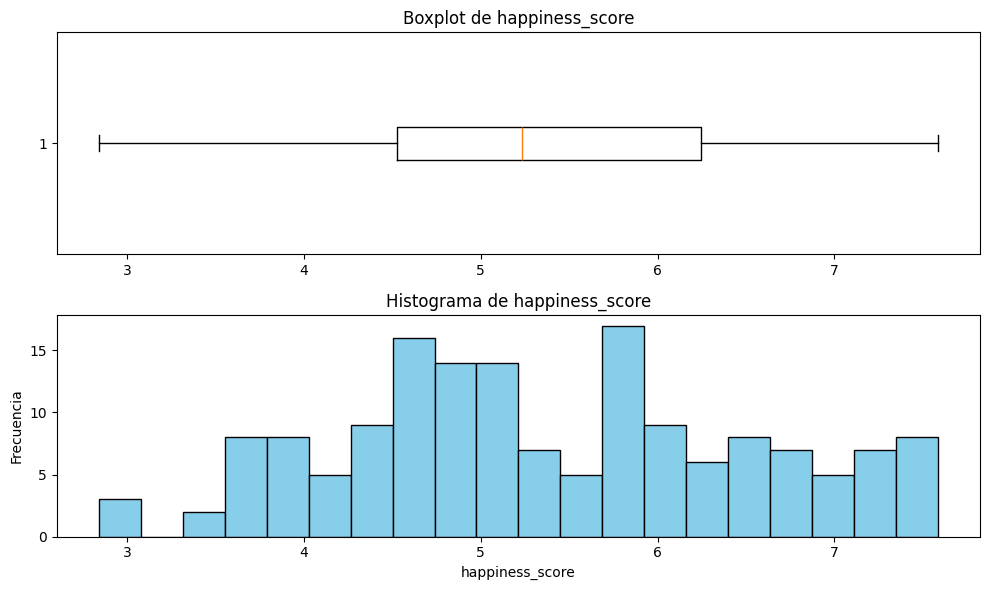

In [61]:
data1 = df2['happiness_score']

# Creo figura con dos subplots: uno para boxplot y otro para histograma
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))

# Boxplot
axes[0].boxplot(data1, vert=False)
axes[0].set_title(f'Boxplot de happiness_score')
axes[0].set_xlabel('')

# Histograma
axes[1].hist(data1, bins=20, color='skyblue', edgecolor='black')
axes[1].set_title(f'Histograma de happiness_score')
axes[1].set_xlabel('happiness_score')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

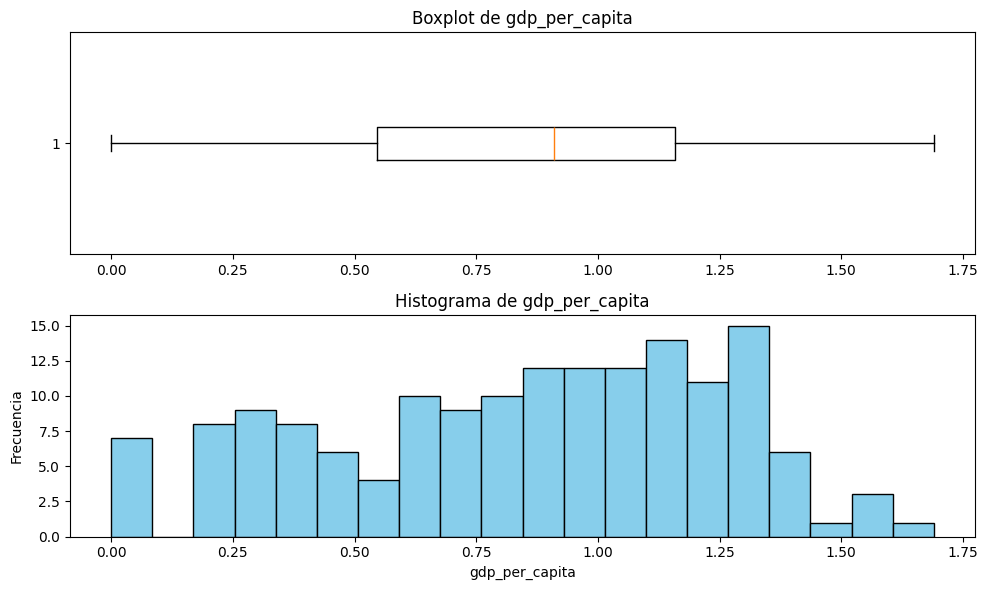

In [65]:
data2 = df2['economy_(gdp_per_capita)']

# Creo figura con dos subplots: uno para boxplot y otro para histograma
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))

# Boxplot
axes[0].boxplot(data2, vert=False)
axes[0].set_title(f'Boxplot de gdp_per_capita')
axes[0].set_xlabel('')

# Histograma
axes[1].hist(data2, bins=20, color='skyblue', edgecolor='black')
axes[1].set_title(f'Histograma de gdp_per_capita')
axes[1].set_xlabel('gdp_per_capita')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

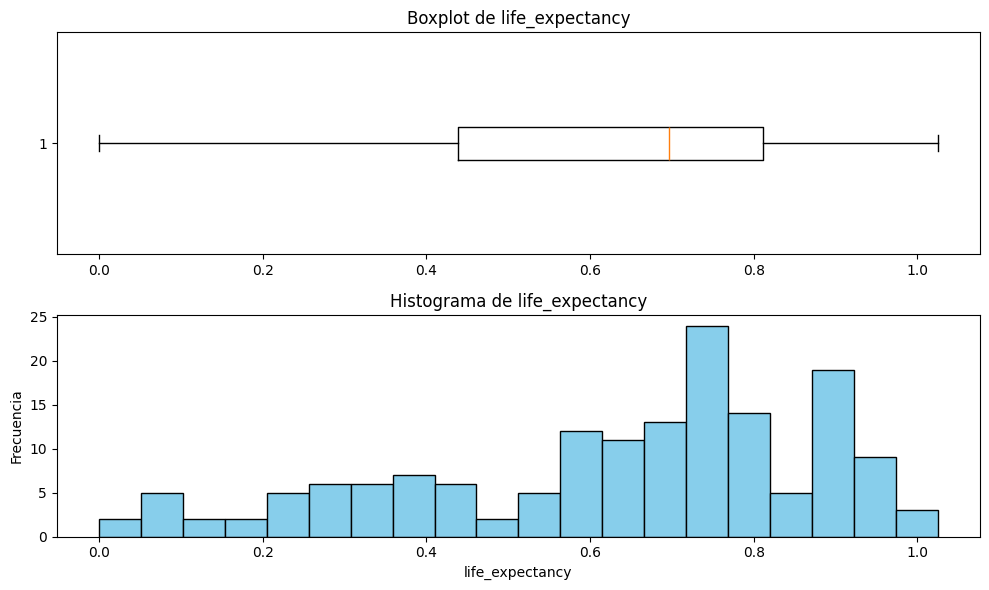

In [63]:
data3 = df2['health_(life_expectancy)']

# Creo figura con dos subplots: uno para boxplot y otro para histograma
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))

# Boxplot
axes[0].boxplot(data3, vert=False)
axes[0].set_title(f'Boxplot de life_expectancy')
axes[0].set_xlabel('')

# Histograma
axes[1].hist(data3, bins=20, color='skyblue', edgecolor='black')
axes[1].set_title(f'Histograma de life_expectancy')
axes[1].set_xlabel('life_expectancy')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

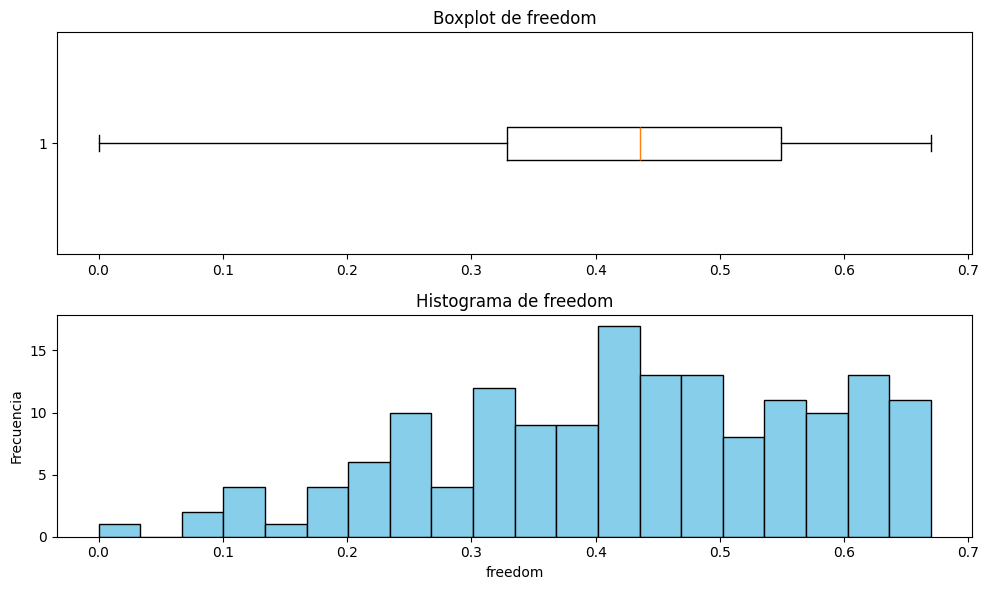

In [66]:
data4 = df2['freedom']

# Creo figura con dos subplots: uno para boxplot y otro para histograma
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))

# Boxplot
axes[0].boxplot(data4, vert=False)
axes[0].set_title(f'Boxplot de freedom')
axes[0].set_xlabel('')

# Histograma
axes[1].hist(data4, bins=20, color='skyblue', edgecolor='black')
axes[1].set_title(f'Histograma de freedom')
axes[1].set_xlabel('freedom')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Interpreta los resultados y escribe un análisis sobre la distribución de cada variable y la presencia de valores atípicos

1. **happiness_score**: Existen algunos valores atípicos bajos que representan países con condiciones desfavorables. La mayoría de los países se agrupa en un rango medio-alto de felicidad.

2. **Economy (GDP per Capita)**:El boxplot muestra que estos valores extremos influyen fuertemente en la escala, alejando la mediana del promedio. Esto evidencia desigualdad económica significativa entre países

3. **Health:** El boxplot indica una baja cantidad de valores atípicos, lo cual sugiere una distribución más homogénea que otras variables. Es decir, las diferencias en esperanza de vida entre países no son tan extremas como en el caso del PIB.

4. **Freedom**:Aunque muchos países tienen niveles moderados de libertad, la diferencia entre los más y los menos libres es muy marcada. El gráfico evidencia una importante variabilidad en los niveles de libertad percibida a nivel mundial.